# 1.Histogram Calculation in OpenCV

*cv2.calcHist(images, channels,mask, histSize, ranges[,hist[,accumlate]])*

1. images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, “\[img\]”.
2. channels : it is also given in square brackets. It the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is \[0\]. For color image, you can pass \[0\],\[1\] or \[2\] to calculate histogram of blue,green or red channel respectively.
3. mask : mask image. To find histogram of full image, it is given as “None”. But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
4. histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass \[256\].
5. ranges : this is our RANGE. Normally, it is \[0,256\].




In [6]:
import cv2 as cv
import numpy as np

img = cv.imread('D:\\CodingFolder\\OPENCVFolder\\OPENCV-Python\\resource\\1.jpg')
hist = cv.calcHist([img],[0],None, [256],[0,256])

hist is a 256x1 array, each value corresponds to number of pixels in the image with its corresponding pixel value

# 2.Histogram Calculation in Numpy

uses np.histogram() instead of calcHist()

In [7]:
hists,bins = np.histogram(img.ravel(),256,[0,256])

# Plotting Histograms

1. short way: use Matplotlib plotting functions
2. long way: use OpenCv drawing functions

## 1.Using Matplotlib

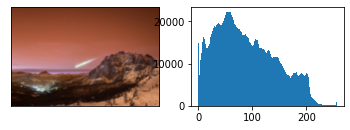

In [20]:
from matplotlib import pyplot as plt

img = cv.imread('D:\\CodingFolder\\OPENCVFolder\\OPENCV-Python\\resource\\1.jpg')
plt.subplot(221), plt.imshow(img, cmap='gray', interpolation='bicubic')
plt.xticks([]),plt.yticks([])
plt.subplot(222), plt.hist(img.ravel(), 256, [0,256])
plt.show()

for BGR plot

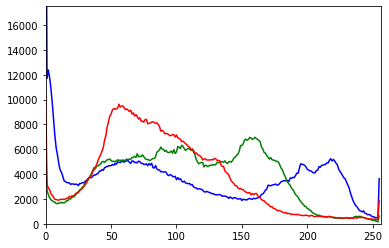

In [19]:
img = cv.imread('D:\\CodingFolder\\OPENCVFolder\\OPENCV-Python\\resource\\2.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])
    plt.ylim([0,17500])
plt.show()

# Application of Mask

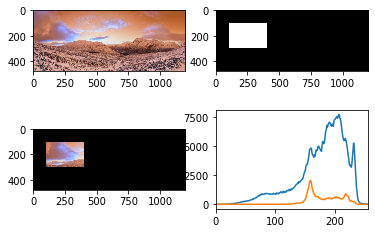

In [23]:
img = cv.imread('D:\\CodingFolder\\OPENCVFolder\\OPENCV-Python\\resource\\7.jpeg')

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv.bitwise_and(img, img, mask = mask)

# Calculate histogram with mask and without mask
hist_full = cv.calcHist([img], [0], None, [256],[0,256])
hist_mask = cv.calcHist([img], [0], mask, [256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask, 'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()